Pictures are taken from here

https://github.com/Dyakonov/DL/blob/master/2022/DL_3NLP_03embeddings_202206a.pdf

# word2vec

Two approaches to realization:

- CBOW
- skip-gram

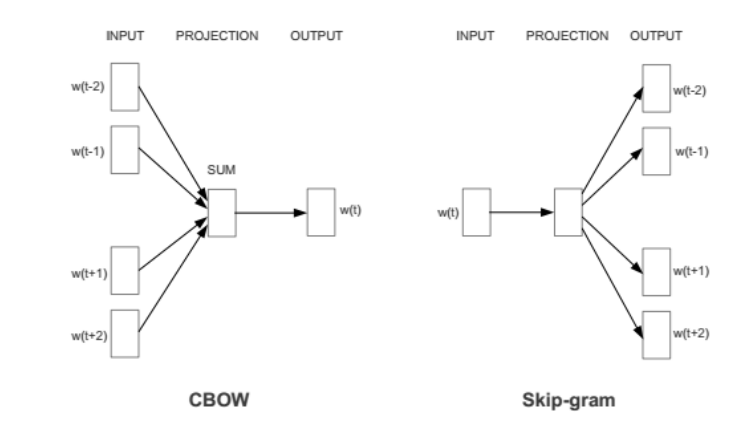

### CBOW (Continuous Bag Of Words)

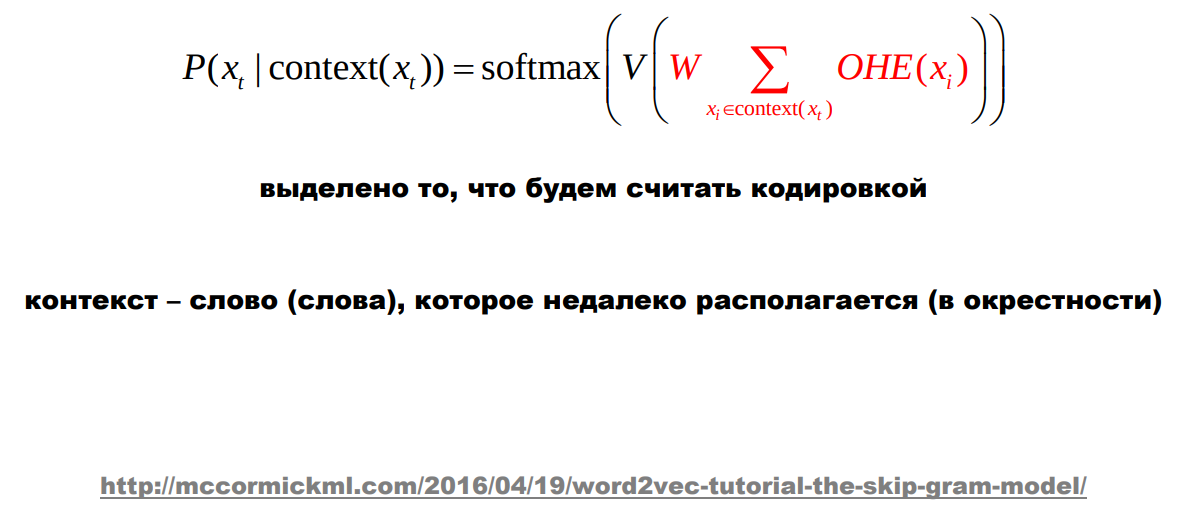

- predict word by context
- OHE - One-Hot Encoding
- word code representation is marked by red
- context - word/words that are situated nearby

### CBOW model

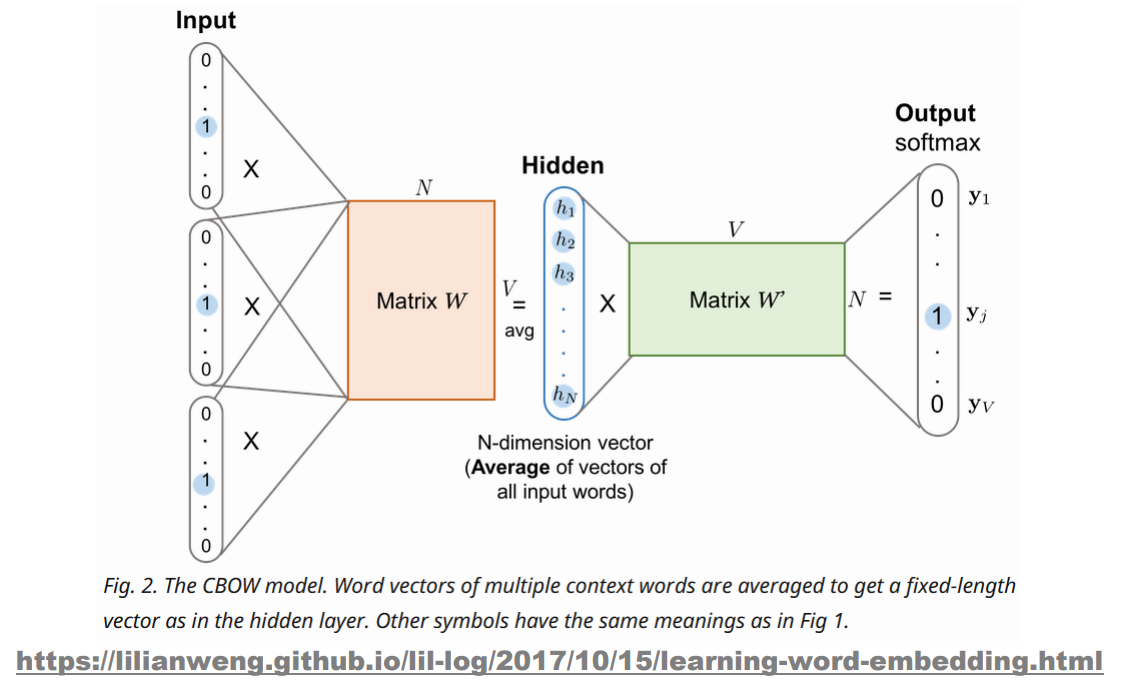

### skip-gram

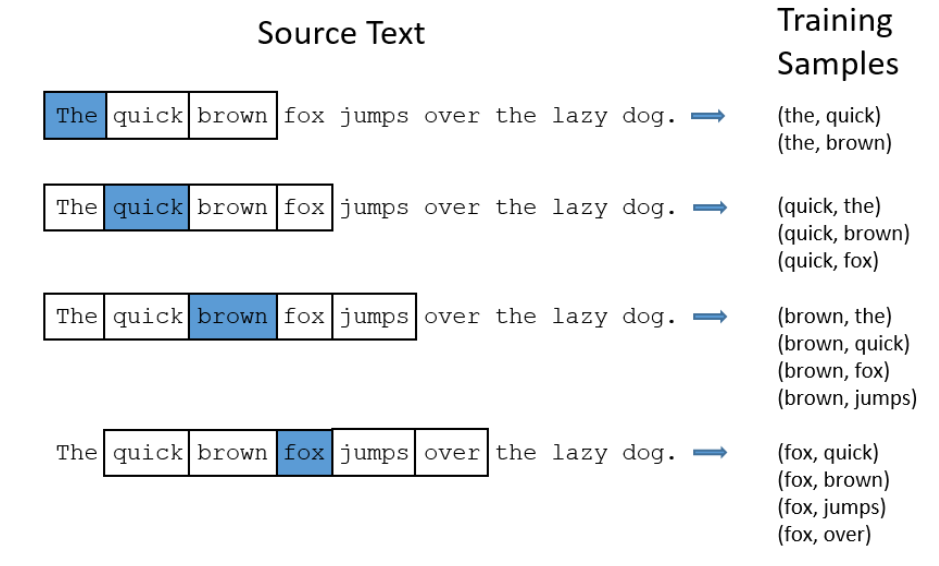

- predict context by word

### skip-gram model

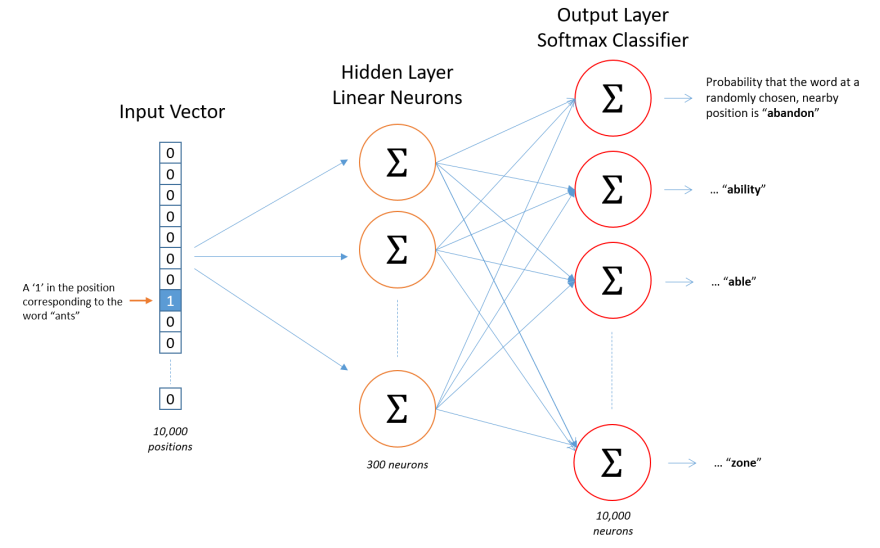

- input: OHE
- hidden layer: vector word representation
- output: word probabiltity distribution

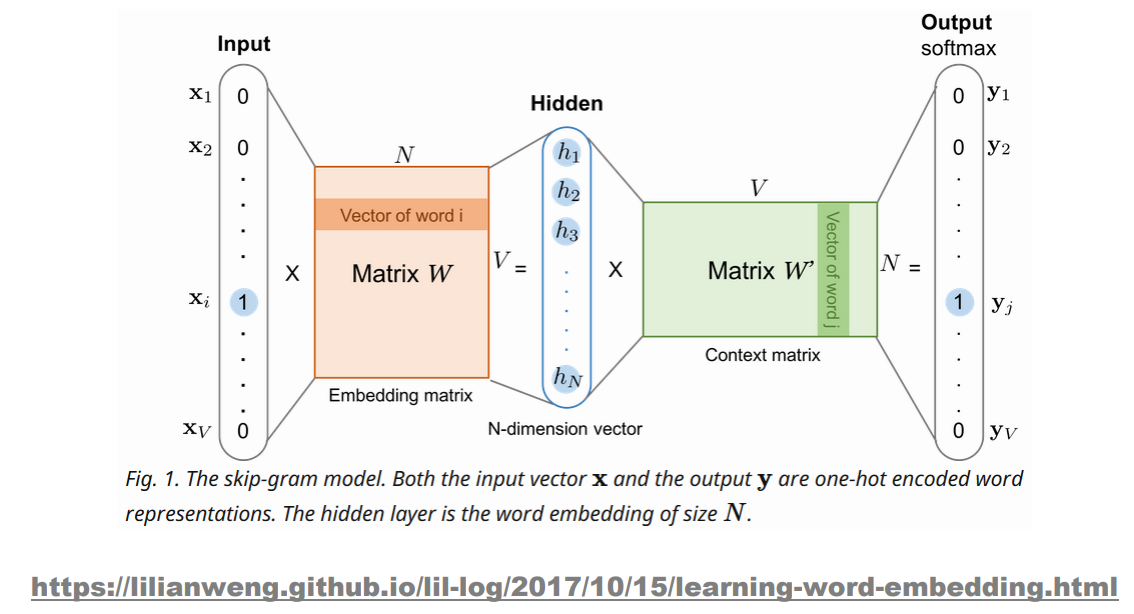

Word code is W_row (row of matrix W) or W_row + W'_row

### How to train word2vec?

Main problem of word2vec is huge NN: first layer = number_of_words x representation_dimensiality (e.g. 50000 x 300).
How to handle this?

- consider frequent phrases as one word: bad_habits, toxic_relations, white_spunner_construction
- select frequent word not so frequently 
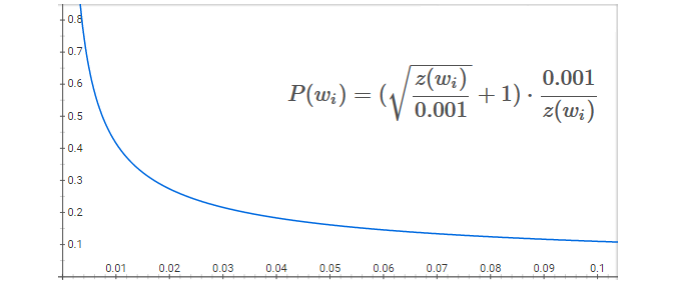
dependence between probability (P(w<sub>i</sub>), y-axis) and frequency (z(w<sub>i</sub>), x-axis)
- negative sampling

### Negative sampling

word2vec likelihood for x<sub>1</sub>, ... x<sub>T</sub>

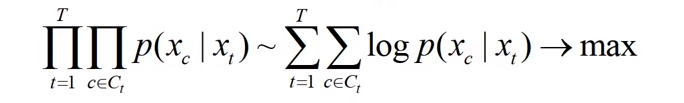

where

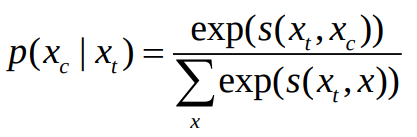

x<sub>t</sub> - vector of word (matrix W)

x<sub>c</sub> - vector of context (matrix W')

for word2vec we can use negative-likelihood

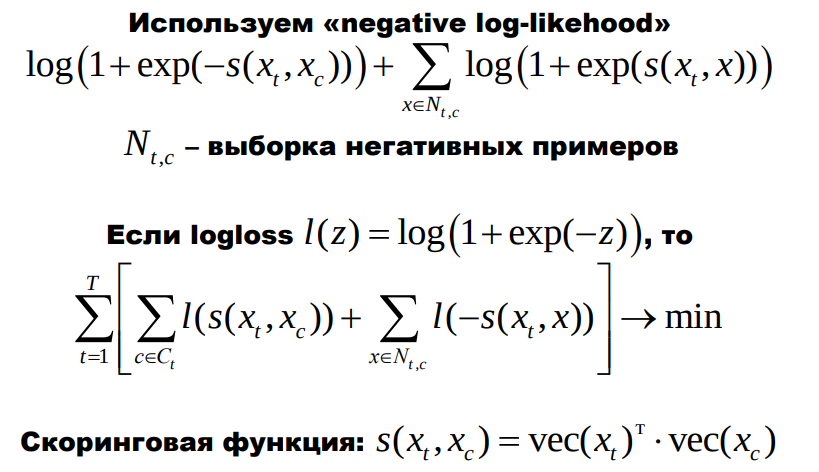

Negative sampling point is do not select all word from dictionary, but randomly select N words (e.g. N=20) and them in our loss function. With high degree of probability all of these word will have negative scoring function s(x<sub>t</sub>, x<sub>c</sub>)

Additional idea: do not select words randomly but select them according to their frequency

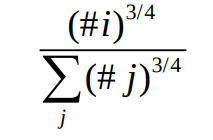

Where #i - word frequency, #j - frequencies of other words. This works better.

### Hierarchial softmax

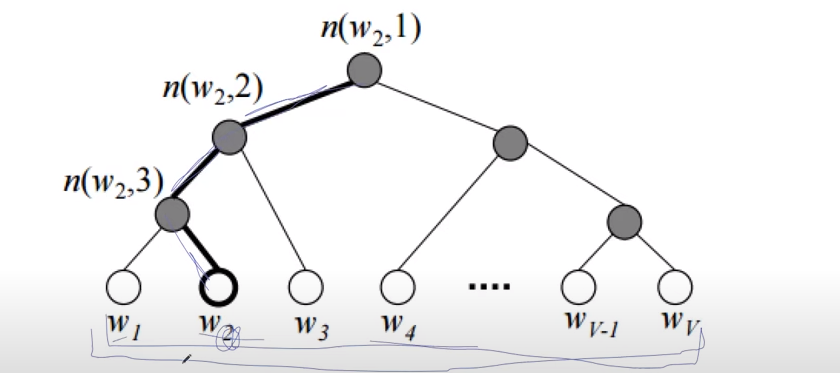

leaves of tree - words

probability - multiplication of all edges that lead to current leave

Can be use for fast softmax calculation

# fasttext

Main idea: word2vec + ngrams.

fasttext procedure

- convert words to ngrams: where ~ <wh, whe, her, ere, re>
- calculate hash for every ngram
- word code = sum of word's ngrams codes

Fasttext helps to solve problem of new words.

# Glove: global vectors

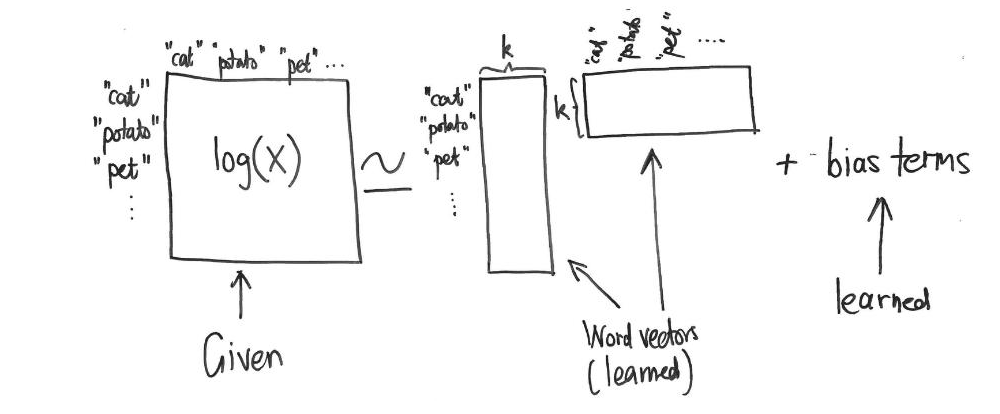

Main idea: decompose pair word frequency matrix on two word vectors

log(x) - logarithm of pair frequency of one word (row) in context of other word (column)

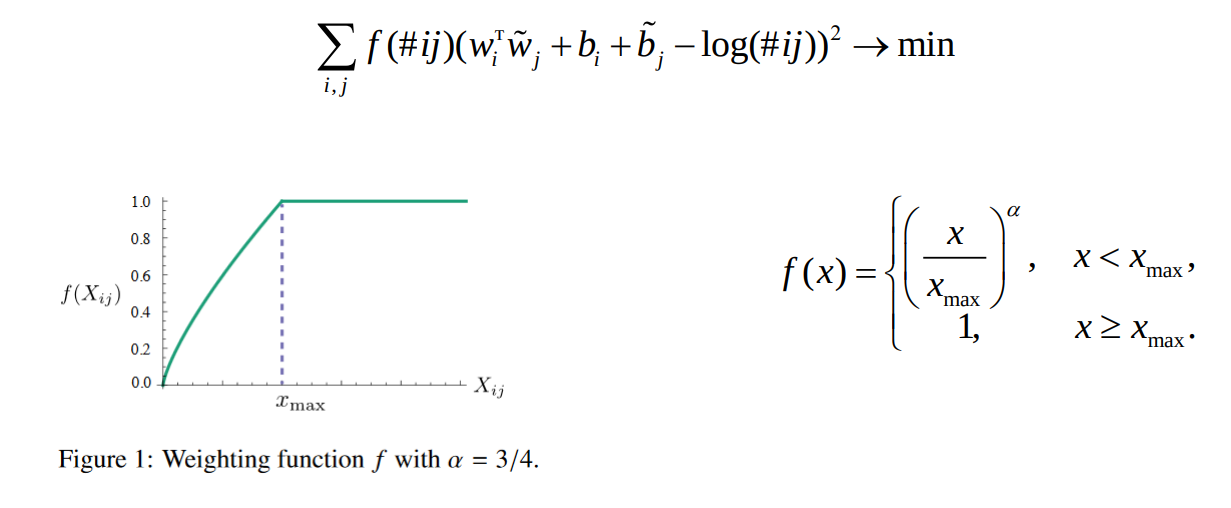

#ij - number of times when word j was met in the context of word i

b<sub>i</sub> and b<sub>j</sub> - biases

# What is the main disadvantage of all previous representations?

They don't take context in account:

The **bank** will not be accepting cash on Saturdays
The river overflowed the **bank**

Same word bank but with compeletely different meaning and in compeletely context.

# TagLM

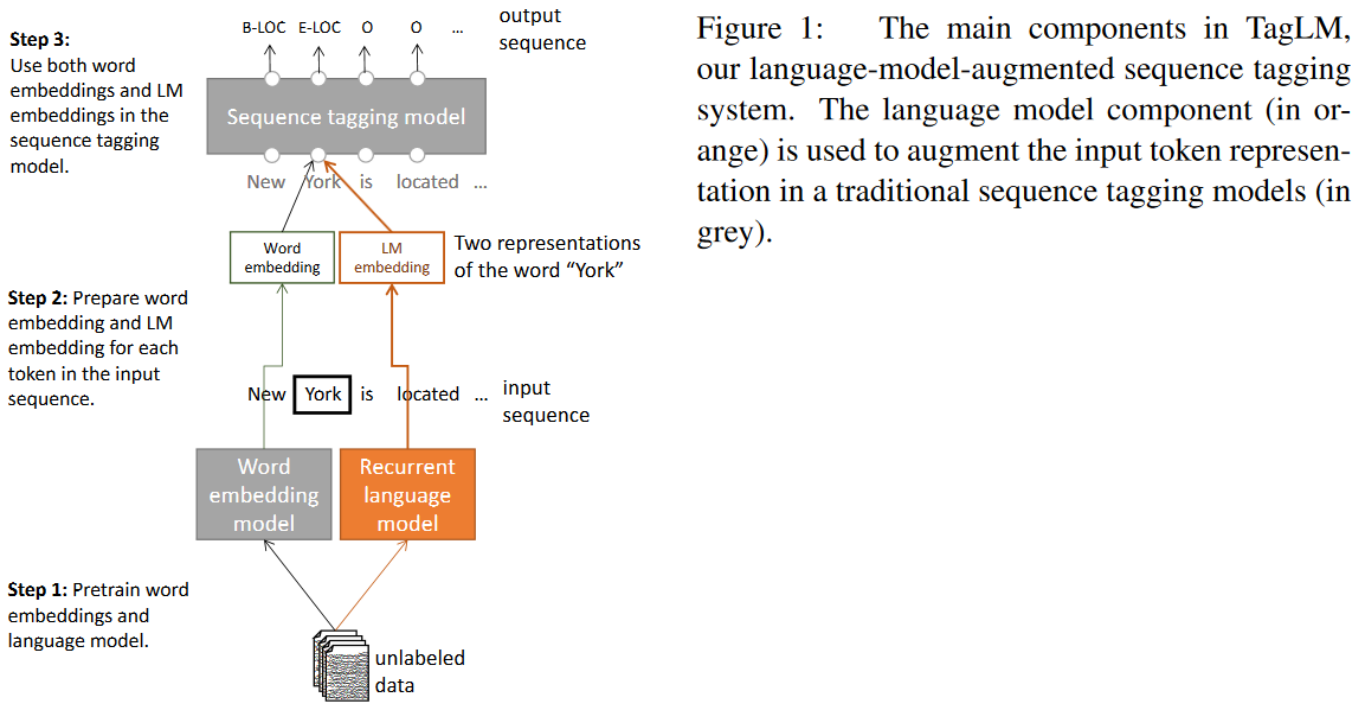

Use word embeddings + pretrained NN model

# CoVe (Contextual Word Vectors)

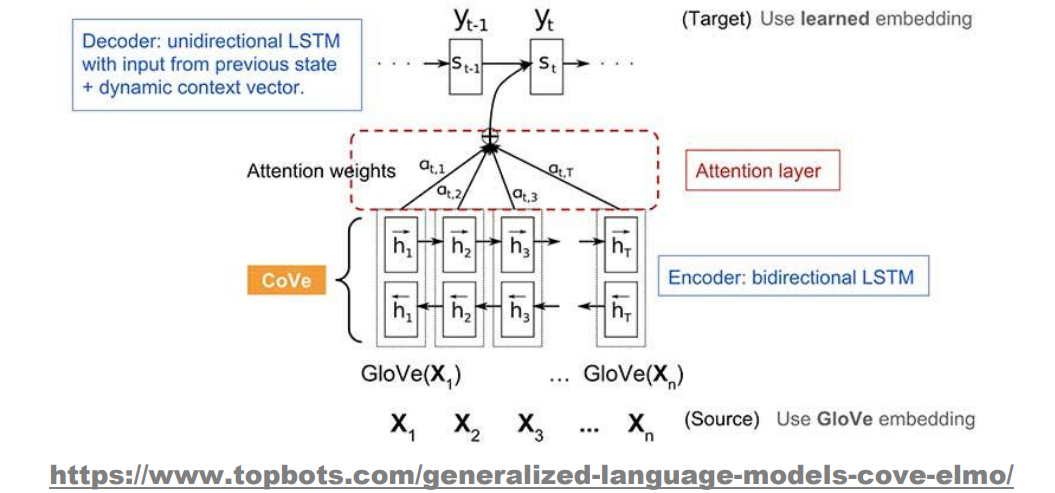

Main idea: train NN (like seq2seq with attention) for translation, then use encoder of that NN to encode words.

Preliminary GloVe word embedding can be used.

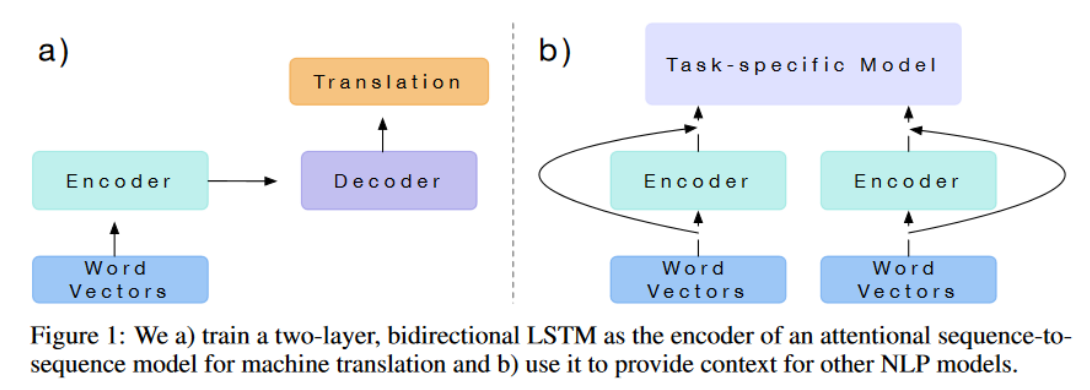

### CoVe results

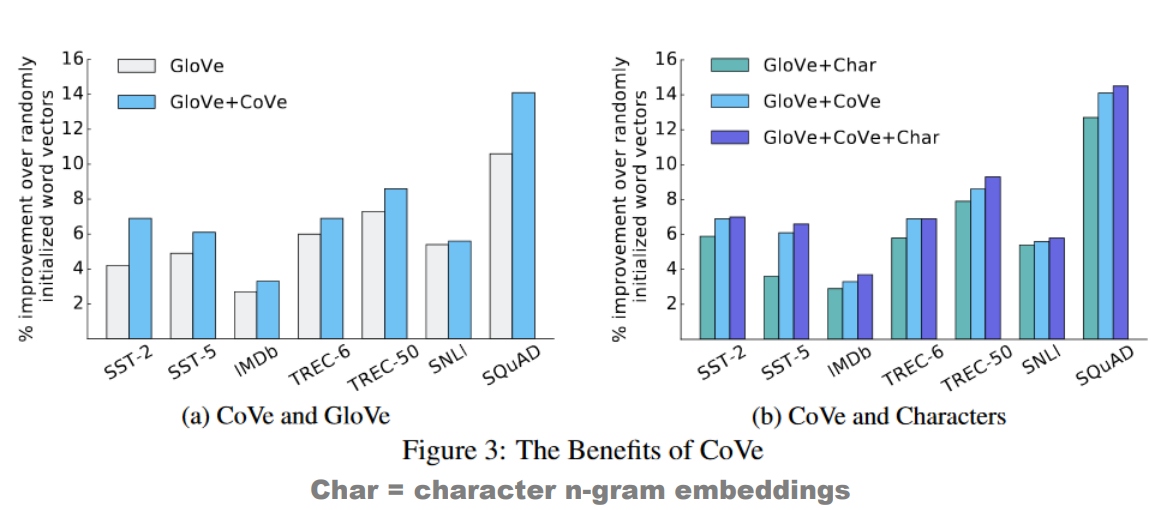

Results are not outstanding, maybe because machine translation is more complex task than language modeling.

# ELMo (Embeddings from Language Models)

Uses bidirectional language model

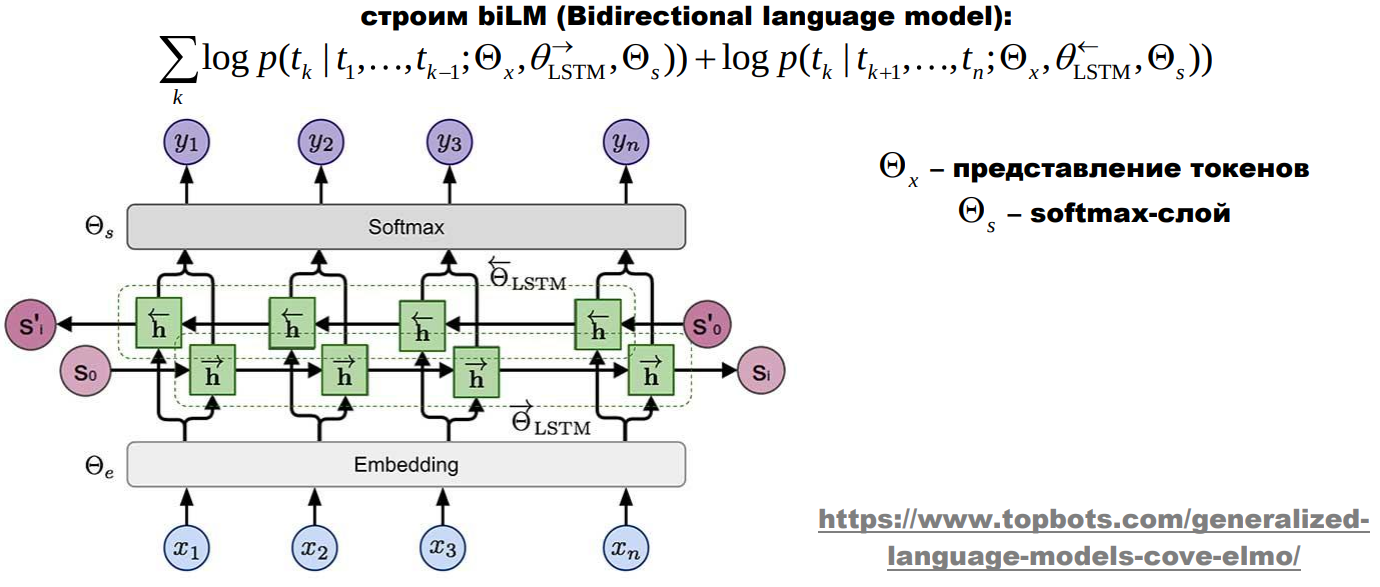

Main idea: train multilayer Bi-LSTM model and use linear combination of word representation from each layer to create vector embedding

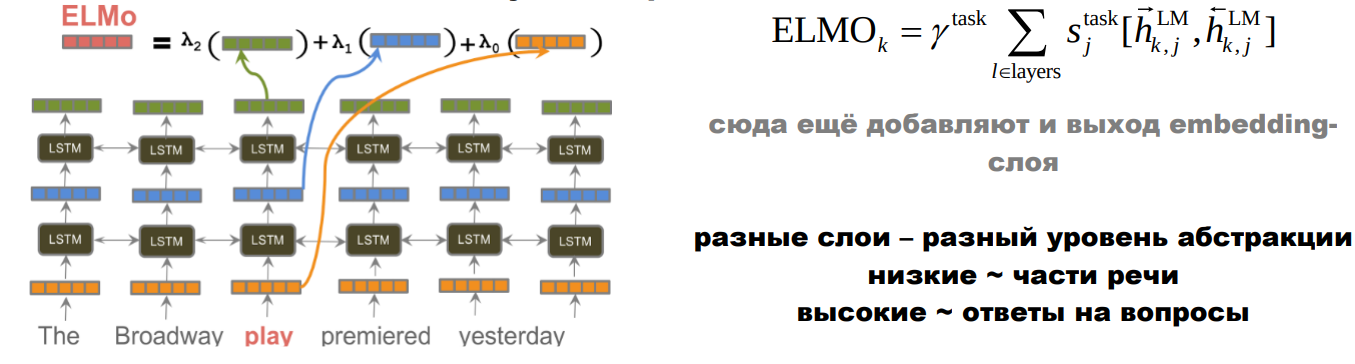

Different layers can give different levels of abstraction

- low layers - tags for parts of speech
- higher layers - answers on questions

### ELMo vs GloVe

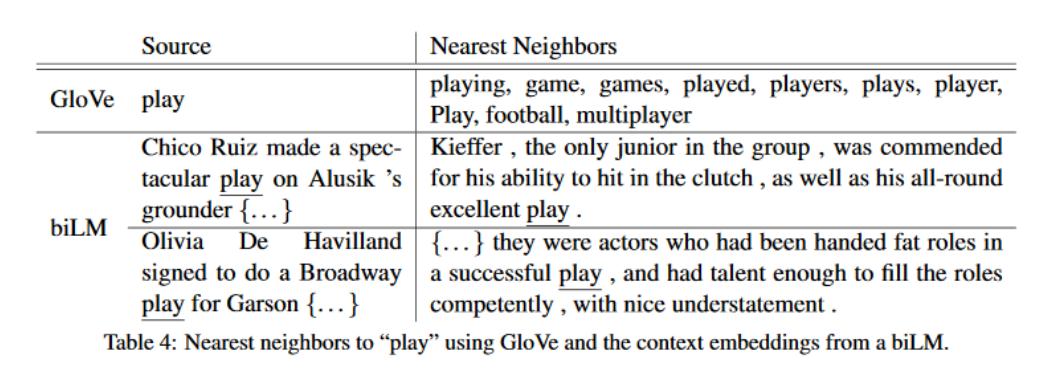

# FLAIR: Contextual String Embeddings for Sequence Labelling

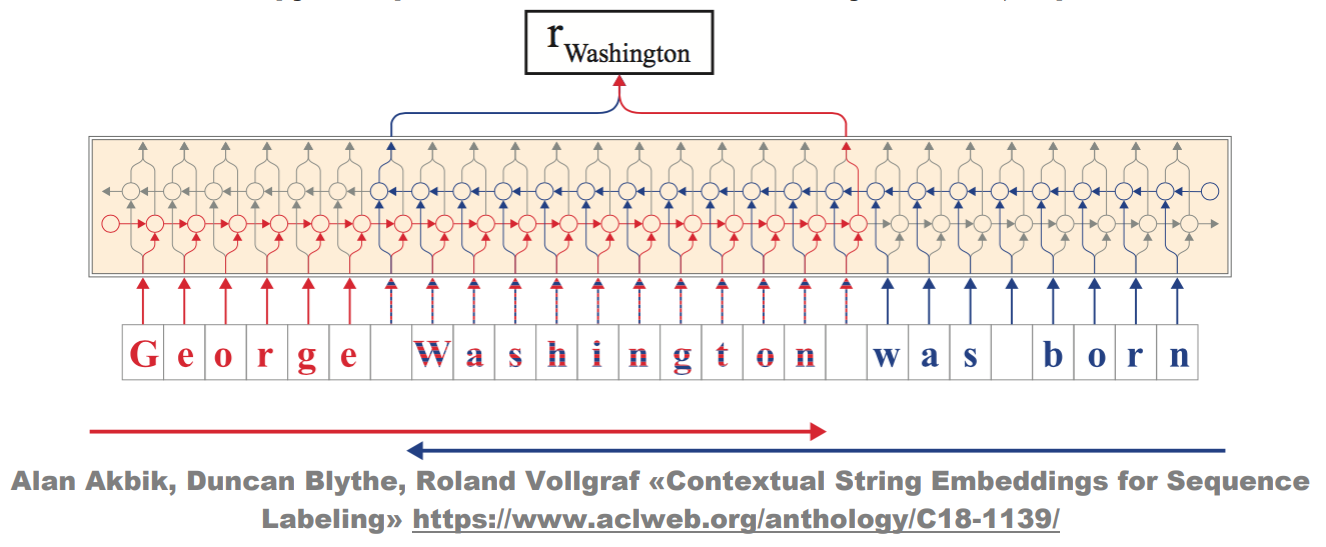

Train bidirectional character-level LM. For every word concatenate hidden state of LM representation for the first character of the word and the last character of the word (first part of bidir model read all sentence text to the left of the last character of the word, second part - all sentence text to the right of the first character of the word)

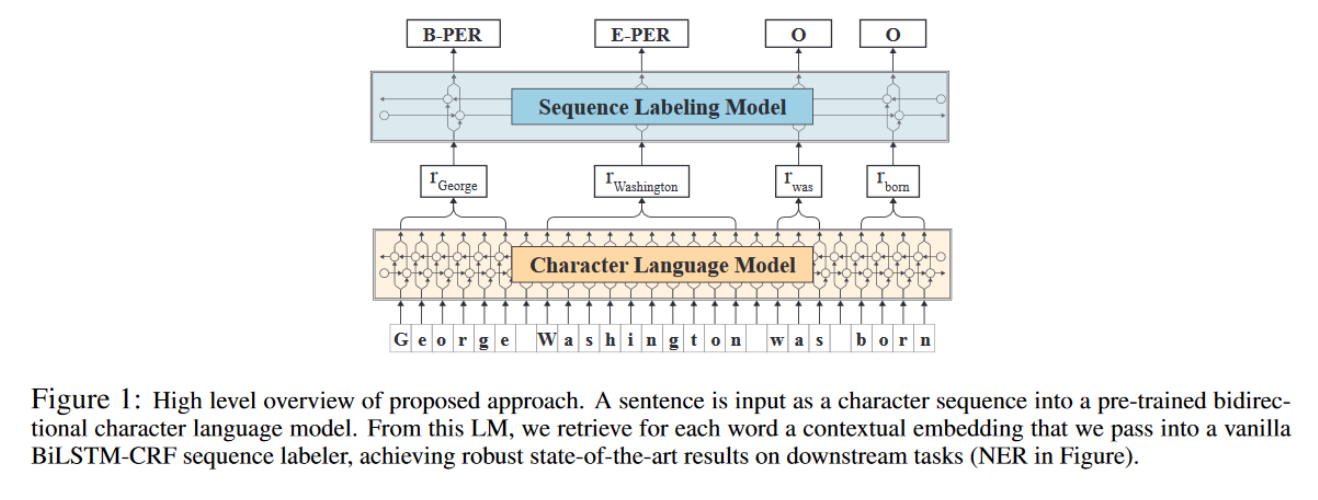

Can be used as encoder for high-level models (like Sequence Labeling Model).